In [273]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cartopy as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
import pandas as pd
import math
import seaborn as sns

In [4]:
data = Dataset('MERRA2_400.tavg1_2d_flx_Nx.20211201.nc4', mode='r')

In [185]:
data #metadata information

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    History: Original file generated: Fri Dec 17 16:02:55 2021 GMT
    Comment: GMAO filename: d5124_m2_jan10.tavg1_2d_flx_Nx.20211201.nc4
    Filename: MERRA2_400.tavg1_2d_flx_Nx.20211201.nc4
    Conventions: CF-1
    Institution: NASA Global Modeling and Assimilation Office
    References: http://gmao.gsfc.nasa.gov
    Format: NetCDF-4/HDF-5
    SpatialCoverage: global
    VersionID: 5.12.4
    TemporalRange: 1980-01-01 -> 2016-12-31
    identifier_product_doi_authority: http://dx.doi.org/
    ShortName: M2T1NXFLX
    GranuleID: MERRA2_400.tavg1_2d_flx_Nx.20211201.nc4
    ProductionDateTime: Original file generated: Fri Dec 17 16:02:55 2021 GMT
    LongName: MERRA2 tavg1_2d_flx_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Surface Flux Diagnostics
    Title: MERRA2 tavg1_2d_flx_Nx: 2d,1-Hourly,Time-Averaged,Single-Level,Assimilation,Surface Flux Diagnostics
    SouthernmostLatitude: -90.0


In [12]:
# longitude and latitude
lons = data.variables['lon']
lats = data.variables['lat']

# wind speed
speed = data.variables['SPEED']


In [70]:
len(lons[:])

576

In [72]:
speed[1,:,:].shape[0]

361

In [69]:
len(lats[:])

361

In [161]:
len(data['time'][:])

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  """Entry point for launching an IPython kernel.


24

In [108]:
# average hourly windspeed  as daily windspeed
speed_daily = speed[:].data.mean(axis=0) 

In [110]:
speed_daily.shape

(361, 576)

In [116]:
#extract wind speed data to dataframe
longitude_values = list(lons[:].data)*361
latitude_values = np.repeat(lats[:].data, 576)
speed_values = speed_daily.flatten()

df = pd.DataFrame({"lon": longitude_values, "lat": latitude_values, "speed": speed_values})

df.head()


,lon,lat,speed
0,-180.000,-90.0,4.57525
1,-179.375,-90.0,4.57525
2,-178.750,-90.0,4.57525
3,-178.125,-90.0,4.57525
4,-177.500,-90.0,4.57525


In [173]:
# import geopy
# def get_zipcode(df, geolocator, lat_field, lon_field):
#     location = geolocator.reverse((df[lat_field], df[lon_field]))
#     return location.raw['address']['postcode']


# geolocator = geopy.Nominatim(user_agent="http")


# zipcodes = df.apply(get_zipcode, axis=1, geolocator=geolocator, lat_field='lat', lon_field='lon')

In [117]:
df.isnull().any().sum()

0

In [123]:
df.describe()

,lon,lat,speed
count,207936.000000,2.079360e+05,207936.000000
mean,-0.312500,0.000000e+00,8.007290
std,103.923142,5.210579e+01,3.802040
min,-180.000000,-9.000000e+01,0.759032
25%,-90.156250,-4.500000e+01,5.223871
50%,-0.312500,-1.797510e-13,7.427829
75%,89.531250,4.500000e+01,10.139867
max,179.375000,9.000000e+01,29.306778


In [104]:
longitude_values

[-180.0,
 -179.375,
 -178.75,
 -178.125,
 -177.5,
 -176.875,
 -176.25,
 -175.625,
 -175.0,
 -174.375,
 -173.75,
 -173.125,
 -172.5,
 -171.875,
 -171.25,
 -170.625,
 -170.0,
 -169.375,
 -168.75,
 -168.125,
 -167.5,
 -166.875,
 -166.25,
 -165.625,
 -165.0,
 -164.375,
 -163.75,
 -163.125,
 -162.5,
 -161.875,
 -161.25,
 -160.625,
 -160.0,
 -159.375,
 -158.75,
 -158.125,
 -157.5,
 -156.875,
 -156.25,
 -155.625,
 -155.0,
 -154.375,
 -153.75,
 -153.125,
 -152.5,
 -151.875,
 -151.25,
 -150.625,
 -150.0,
 -149.375,
 -148.75,
 -148.125,
 -147.5,
 -146.875,
 -146.25,
 -145.625,
 -145.0,
 -144.375,
 -143.75,
 -143.125,
 -142.5,
 -141.875,
 -141.25,
 -140.625,
 -140.0,
 -139.375,
 -138.75,
 -138.125,
 -137.5,
 -136.875,
 -136.25,
 -135.625,
 -135.0,
 -134.375,
 -133.75,
 -133.125,
 -132.5,
 -131.875,
 -131.25,
 -130.625,
 -130.0,
 -129.375,
 -128.75,
 -128.125,
 -127.5,
 -126.875,
 -126.25,
 -125.625,
 -125.0,
 -124.375,
 -123.75,
 -123.125,
 -122.5,
 -121.875,
 -121.25,
 -120.625,
 -120.0,
 -119.3

In [213]:
len(speed_values)

207936

In [211]:
len(longitude_values)

207936

In [212]:
len(latitude_values)

207936

In [214]:
len(speed[1,1,:].data)

576

In [163]:
df2 = pd.read_csv('Power_Plants.csv')

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (3,4,5,6,8,9,10,13,14,17,18,19,20,21,22,23,24,25,34,35,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [164]:
df2.head()

,X,Y,OBJECTID,PLANT_CODE,NAME,ADDRESS,CITY,STATE,ZIP,TELEPHONE,...,SUB_1,SUB_2,LINES,SOURCE_LAT,SOURC_LONG,GlobalID,CreationDate,Creator,EditDate,Editor
0,-1.361831e+07,5.157821e+06,188,294,COPCO 1,COPCO RD 20 MI EAST OF I5,HORNBROOK,CA,96044,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,0.0,41.978914,-122.335317,{FD7408A0-3F2E-4D4A-84D4-D06C22002E1B},2021/12/29 05:49:30+00,HostedByHIFLD,2021/12/29 05:49:30+00,HostedByHIFLD
1,-1.362084e+07,5.157343e+06,189,295,COPCO 2,19305 DAGGETT ROAD,HORNBROOK,CA,96044,NOT AVAILABLE,...,COPCO 2,NOT AVAILABLE,0.0,41.975716,-122.358127,{491F1438-9905-40C3-8561-741E4CD78C37},2021/12/29 05:49:30+00,HostedByHIFLD,2021/12/29 05:49:30+00,HostedByHIFLD
2,-1.362960e+07,5.150946e+06,191,297,IRON GATE,COPCO RD 9 MI EAST OF I5,HORNBROOK,CA,96044,NOT AVAILABLE,...,NOT AVAILABLE,NOT AVAILABLE,0.0,41.932981,-122.436780,{5B9E0FBC-43FB-460D-8187-FD55042EB501},2021/12/29 05:49:30+00,HostedByHIFLD,2021/12/29 05:49:30+00,HostedByHIFLD
3,-1.256280e+07,4.648705e+06,193,299,BLUNDELL,10 MI EAST OF HIGHWAY 257,MILFORD,UT,84751,NOT AVAILABLE,...,BLUNDELL,NOT AVAILABLE,1.0,38.488771,-112.853591,{5FF77F2B-41AD-478A-9FF3-37D04737CE25},2021/12/29 05:49:30+00,HostedByHIFLD,2021/12/29 05:49:30+00,HostedByHIFLD
4,-1.241182e+07,5.477623e+06,548,825,ASHTON,1338 N 3300 E,ASHTON,ID,83420,NOT AVAILABLE,...,UNKNOWN204720,NOT AVAILABLE,1.0,44.078656,-111.497266,{DF869347-58EA-4E2F-8C0F-89ACE845E63F},2021/12/29 05:49:30+00,HostedByHIFLD,2021/12/29 05:49:30+00,HostedByHIFLD


In [165]:
df2['LATITUDE']

0        41.978914
1        41.975716
2        41.932981
3        38.488771
4        44.078656
           ...    
83000          NaN
83001          NaN
83002          NaN
83003          NaN
83004          NaN
Name: LATITUDE, Length: 83005, dtype: float64

In [166]:
df2['LONGITUDE']

0       -122.335317
1       -122.358127
2       -122.436780
3       -112.853591
4       -111.497266
            ...    
83000           NaN
83001           NaN
83002           NaN
83003           NaN
83004           NaN
Name: LONGITUDE, Length: 83005, dtype: float64

In [197]:

def find_nearest(speed_l, df_l, resolution):
    for i in range(len(df_l)):
        if (np.isnan(df_l[i])== False):
            for j in speed_l:
                if (abs(df_l[i]-j) <= resolution):
                    df_l[i] = j
                    break
    return df_l

In [198]:
df2_lon = find_nearest(list(lons[:].data),df2['LONGITUDE'],0.625)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [200]:
df2['LONGITUDE'] = df2_lon

In [201]:
df2_lat = find_nearest(list(lats[:].data),df2['LATITUDE'],0.5)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [202]:
df2['LATITUDE'] = df2_lat

In [362]:
df2_transform = df2[['LONGITUDE','LATITUDE','OPER_CAP','TYPE','COAL_USED','NGAS_USED','OIL_USED']]
df2_transform.head()

,LONGITUDE,LATITUDE,OPER_CAP,TYPE,COAL_USED,NGAS_USED,OIL_USED
0,-122.500,41.5,26.0,HYDROELECTRIC PUMPED STORAGE,0.0,0.0,0.0
1,-122.500,41.5,36.0,HYDROELECTRIC PUMPED STORAGE,0.0,0.0,0.0
2,-122.500,41.5,19.0,HYDROELECTRIC PUMPED STORAGE,0.0,0.0,0.0
3,-113.125,38.0,44.8,GEOTHERMAL,0.0,0.0,0.0
4,-111.875,44.0,6.7,CONVENTIONAL HYDROELECTRIC,0.0,0.0,0.0


In [363]:
final_df = pd.merge(df,df2_transform, left_on=['lon','lat'], right_on = ['LONGITUDE','LATITUDE'], how='right')

In [364]:
final_df.to_csv('data1.csv',index=False)

In [365]:
final_df.head()

,lon,lat,speed,LONGITUDE,LATITUDE,OPER_CAP,TYPE,COAL_USED,NGAS_USED,OIL_USED
0,-122.500,41.5,4.161290,-122.500,41.5,26.0,HYDROELECTRIC PUMPED STORAGE,0.0,0.0,0.0
1,-122.500,41.5,4.161290,-122.500,41.5,36.0,HYDROELECTRIC PUMPED STORAGE,0.0,0.0,0.0
2,-122.500,41.5,4.161290,-122.500,41.5,19.0,HYDROELECTRIC PUMPED STORAGE,0.0,0.0,0.0
3,-113.125,38.0,5.384007,-113.125,38.0,44.8,GEOTHERMAL,0.0,0.0,0.0
4,-111.875,44.0,6.046074,-111.875,44.0,6.7,CONVENTIONAL HYDROELECTRIC,0.0,0.0,0.0


In [226]:
#newdf = final_df.dropna()

In [231]:
#df_new = newdf[newdf['TYPE'].str.contains('WIND')]

In [331]:
len(final_df)

83005

In [238]:
final_df.isnull().sum()

lon          2314
lat          2314
speed        2314
LONGITUDE    2314
LATITUDE     2314
OPER_CAP     2314
COAL_USED    2314
NGAS_USED    2314
OIL_USED     2314
dtype: int64

In [276]:
final_df['OIL_USED'].value_counts()

 0.0         63671
-999999.0     6633
 5.0           101
 10.0           80
 15.0           64
             ...  
 82546.0         1
 8940.0          1
 5676.0          1
 3579.0          1
 4041.0          1
Name: OIL_USED, Length: 2334, dtype: int64

In [287]:
final_df['OIL_USED'].value_counts()

 0.00         9655
-999999.00    5227
 1.00         3384
 5.00         3170
 2.00         2693
              ... 
 810.40          1
 1011.40         1
 205.20          1
 780.00          1
 4.45            1
Name: OPER_CAP, Length: 2348, dtype: int64

In [373]:
len(final_df)

83005

In [294]:
max(final_df['OIL_USED'])

4146272.0

In [295]:
final_df['OIL_USED'].describe()

count    8.069100e+04
mean    -7.973232e+04
std      2.793709e+05
min     -9.999990e+05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.146272e+06
Name: OIL_USED, dtype: float64

In [285]:
len(final_df)

83005

In [332]:
final_df = final_df.dropna()

In [354]:
df3 = final_df.drop(final_df[(final_df['OPER_CAP']==-999999) | (final_df['OPER_CAP']==0)].index)
final_df.loc[(final_df['OPER_CAP']==-999999) | (final_df['OPER_CAP']==0)] = df3['OPER_CAP'].mean()

In [355]:
df4 = final_df.drop(final_df[(final_df['OIL_USED']==-999999) | (final_df['OIL_USED']==0)].index)
final_df.loc[(final_df['OIL_USED']==-999999) | (final_df['OIL_USED']==0)] = df4['OIL_USED'].mean()

In [356]:
df5 = final_df.drop(final_df[(final_df['NGAS_USED']==-999999) | (final_df['NGAS_USED']==0)].index)
final_df.loc[(final_df['NGAS_USED']==-999999) | (final_df['NGAS_USED']==0)] = df5['NGAS_USED'].mean()

In [357]:
df6 = final_df.drop(final_df[(final_df['COAL_USED']==-999999) | (final_df['COAL_USED']==0)].index)
final_df.loc[(final_df['COAL_USED']==-999999) | (final_df['COAL_USED']==0)] = df6['COAL_USED'].mean()

In [345]:
final_df['NGAS_USED'].describe()

count    8.069100e+04
mean     2.868039e+05
std      3.169192e+06
min      1.000000e+00
25%      7.982866e+03
50%      7.982866e+03
75%      7.982866e+03
max      1.462194e+08
Name: NGAS_USED, dtype: float64

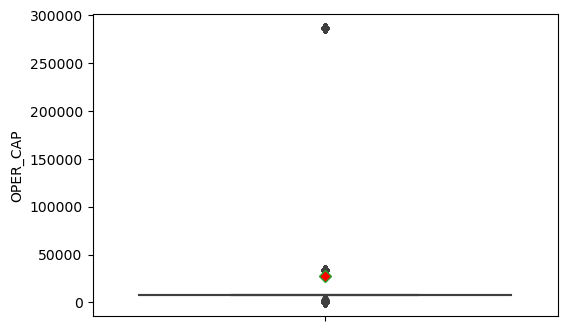

In [358]:
plt.figure(dpi=100)
sns.boxplot(y=final_df['OPER_CAP'],
            showmeans=True,
            meanprops = {'marker':'D','markerfacecolor':'red'},
           )
ax.set(ylim=(10, 40))
plt.show()

In [255]:
max(speed_value.data.flatten())

31.348936

In [256]:
min(speed_value.data.flatten())

0.1864407

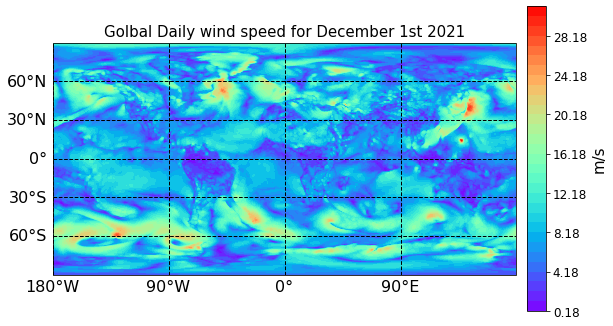

In [378]:
#plot global  Daily wind speed for December 1st 2021

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection=ccrs.crs.PlateCarree())
ax.coastlines(resolution="110m",linewidth=1)
ax.add_feature(ccrs.feature.STATES)
gl = ax.gridlines(crs=ccrs.crs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':16, 'color':'black'}
gl.ylabel_style = {'size':16, 'color':'black'}

clevs = np.arange(0.18,31.35,1)
plt.contourf(lon, lat, speed_value.data,clevs, cmap=plt.cm.rainbow)
plt.title('Golbal Daily wind speed for December 1st 2021', size=15)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=15)
cb.ax.tick_params(labelsize=12)


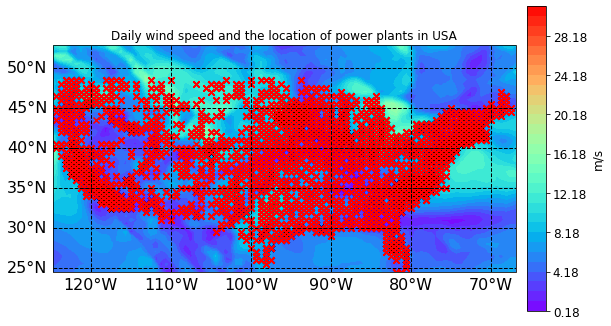

In [381]:
#plot the wind speed and location of power plants
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection=ccrs.crs.PlateCarree())
ax.coastlines(resolution="110m",linewidth=1)
ax.add_feature(ccrs.feature.STATES)
gl = ax.gridlines(crs=ccrs.crs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
ax.set_extent([-66.95, -124.77, 24.52,  49.38]) #set the lon and lat range
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size':16, 'color':'black'}
gl.ylabel_style = {'size':16, 'color':'black'}
clevs = np.arange(0.18,31.35,1)
plt.contourf(lon, lat, speed_value.data,clevs, cmap=plt.cm.rainbow)
plt.title('Daily wind speed and the location of power plants in USA', size=12)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12)
cb.ax.tick_params(labelsize=12)

plt.scatter(x=df2['LONGITUDE'], y=df2['LATITUDE'], marker='x', c='r')
plt.show()